In [ ]:
#install required packages
!pip install imblearn
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data
jobPostings_raw_df = pd.read_csv("/content/fake_job_postings.csv")

In [ ]:
jobPostings_raw_df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
jobPostings_raw_df.shape

(17880, 18)

In [ ]:
jobPostings_raw_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
#Examining Null values in each feature

jobPostings_raw_df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

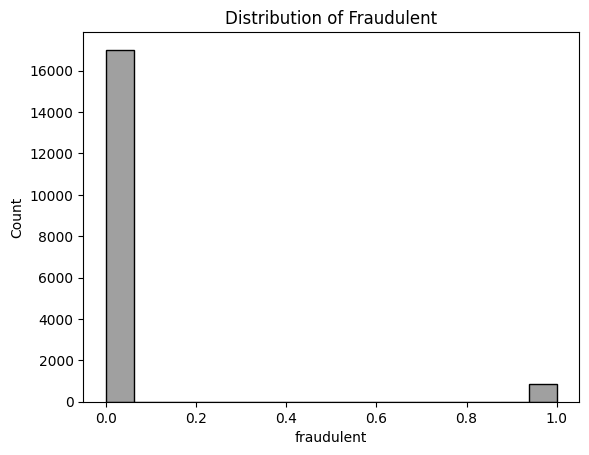

In [ ]:
#checking distribution of dependent variable

sns.histplot(jobPostings_raw_df['fraudulent'], color='grey')
plt.title('Distribution of Fraudulent')
plt.show()

In [ ]:
#check data columns
jobPostings_raw_df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
# let us check the missing values in our dataset

jobPostings_raw_df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
jobPostings_raw_df.shape

(17880, 18)

In [ ]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
jobPostings_raw_df.fillna(' ', inplace=True)

In [ ]:
# #Create independent and Dependent Features
# columns = jobPostings_raw_df.columns.tolist()
# # Filter the columns to remove data we do not want
# columns = [c for c in columns if c not in ["fraudulent"]]
# # Store the variable we are predicting
# target = "fraudulent"
# # Define a random state
# state = np.random.RandomState(42)
# X = data[columns]
# Y = data["fraudulent"]
# X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))


# Define the independent features
features = jobPostings_raw_df.columns.tolist()

# Filter the columns to remove data we do not want
features = [c for c in features if c not in ["fraudulent"]]

# Define the dependent feature
target = 'fraudulent'

# Split the data into X (independent features) and y (dependent feature)
X_raw = jobPostings_raw_df[features]
y_raw = jobPostings_raw_df[target]

# Create outliers for X
n_samples, n_features = X_raw.shape
rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-1, high=1, size=(n_samples, n_features))

# Print the shapes of the data arrays
print(f'X shape: {X_raw.shape}')
print(f'y shape: {y_raw.shape}')
print(f'X_outliers shape: {X_outliers.shape}')

X shape: (17880, 17)
y shape: (17880,)
X_outliers shape: (17880, 17)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler to balance the dataset
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X_raw, y_raw)

# Print the shapes of the resampled data arrays
print(f'X_resampled shape: {X.shape}')
print(f'y_resampled shape: {y.shape}')

X_resampled shape: (1732, 17)
y_resampled shape: (1732,)


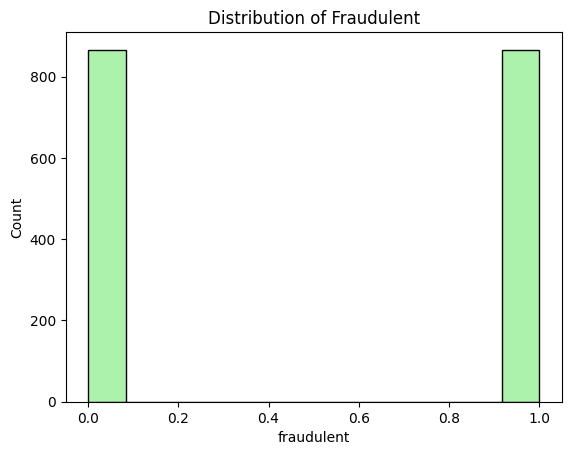

In [ ]:
#checking distribution of dependent variable after sampling

sns.histplot(y, color='lightgreen')
plt.title('Distribution of Fraudulent')
plt.show()

In [ ]:
#construct the resampled data into our dataframe
jobPostings_df_sampled = pd.concat([X, y], axis=1, join='inner')
display(jobPostings_df_sampled)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,5231,SEM Coordinator,"GR, I, Athens",,,#URL_c379aa631173ed5b7c345ab3f500a9a053e509138...,The right candidate will be responsible for co...,- Previous experience of minimum 3 years...,- Attractive Remuneration Package.- ...,0,1,1,Full-time,,,,,0
1,14113,Senior Data Scientist,"GB, LND, London",Engineering,,"As a growing and successful startup, Conversoc...",Conversocial builds software that helps compan...,Good working knowledge of Python or similar la...,Salary of £40-55k plus stock options£2k annual...,0,1,0,,,,,Engineering,0
2,3169,Junior Web Marketing Specialist,"GR, I, Ilion",Web Marketing και Social,,Η Atnet Communications A.E. είναι μια αμιγώς ε...,Η Atnet Communications αναζητά Junior Web Mark...,Απαιτούμενα προσόντα:Hands-on εμπειρία στην δι...,H θέση αφορά μόνιμη απασχόληση στην περιοχή το...,0,1,1,Full-time,Entry level,,Marketing and Advertising,Marketing,0
3,14805,New Product Development Project Leader - Full ...,"US, GA, Atlanta",,,We Provide Full Time Permanent Positions for m...,Coordination and project management of New Pro...,"Location - Atlanta, GA, USAJob Type – Permanen...",,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Management Consulting,Management,0
4,5810,Data Intern - Retail & Apparel Analysis,"GB, LND, London",Fashion:Internships,14000-14000,"We build software for fashion retailers, to he...",About EDITDEDITD’s software is the market lead...,,,0,1,1,Other,Internship,,Apparel & Fashion,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,,Student Positions Part-Time and Full-Time.You ...,,,0,0,0,Part-time,,,,,1
1728,17829,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,0,1,,,,,,1
1729,17830,Android Developer,"PL, MZ, Warsaw",,,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,0,,,,,,1
1730,17831,Payroll Clerk,"US, NY, New York",,,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [ ]:
#check if all the missing values are removed
jobPostings_df_sampled.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

<ipython-input-54-343ff18f6d88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(jobPostings_raw_df.corr())


<Axes: >

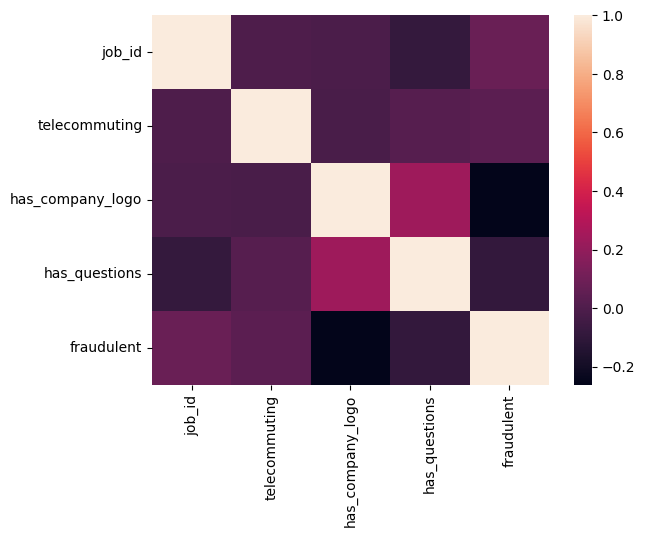

In [ ]:
sns.heatmap(jobPostings_raw_df.corr())

Data cleaning is successfully done

# Exploratory Data Analysis

<Axes: xlabel='fraudulent', ylabel='has_company_logo'>

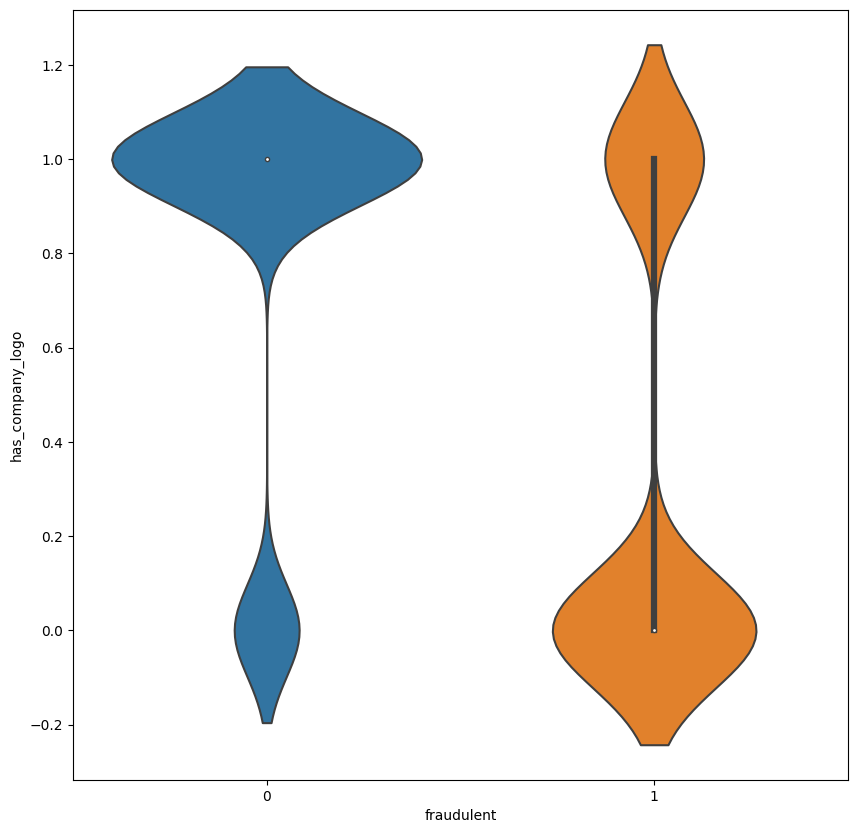

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(x='fraudulent', y='has_company_logo', data=jobPostings_df_sampled)

In [ ]:
#Here we will try to create a word cloud of our textual data
# Define the columns to include in the text
text_columns = ['title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'industry']

features = ['job_id', 'salary_range', 'telecommuting', 'has_questions', 'title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'department', 'has_company_logo', 'employment_type', 'required_experience', 'required_education', 'function']

jobPostings_df = jobPostings_df_sampled

# Concatenate the text columns into a new column called 'text'
jobPostings_df['data_in_text_form'] = jobPostings_df_sampled[text_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

jobPostings_df.head()

# Drop the original text columns
jobPostings_df.drop(columns=features, inplace=True)

# Print the head of the modified dataframe
jobPostings_df.head()


,fraudulent,data_in_text_form
0,0,"SEM Coordinator GR, I, Athens #URL_c379aa63117..."
1,0,"Senior Data Scientist GB, LND, London As a gro..."
2,0,"Junior Web Marketing Specialist GR, I, Ilion Η..."
3,0,New Product Development Project Leader - Full ...
4,0,"Data Intern - Retail & Apparel Analysis GB, LN..."


In [ ]:
jobPostings_df.columns

Index(['fraudulent', 'data_in_text_form'], dtype='object')

In [ ]:
#converting all the text to lower case
jobPostings_df['data_in_text_form'] = jobPostings_df['data_in_text_form'].apply(lambda x:x.lower())


jobPostings_df.iloc[1,1]

"senior data scientist gb, lnd, london as a growing and successful startup, conversocial is a great place to work for ambitious individuals.we build a market leading social customer service solution, and we need even more great people to help us push that position even further. you’ll get the opportunity to work in an exciting new market, where we’re helping companies to understand the solution to their problems and are changing the way they interact with consumers.we have a trusting, hands-off management style, which is suited for people that are self-motivated.our employees have the opportunity for independence and responsibility over their own projects, but we provide all the support and training they need to get there and to develop their careers.at conversocial we like to balance work and play.we eat lunch together everyday (a company perk) and all enjoy a friday treat of cake and few drinks. our close-knit team is very sociable, which makes the conversocial office a relaxed, fun 

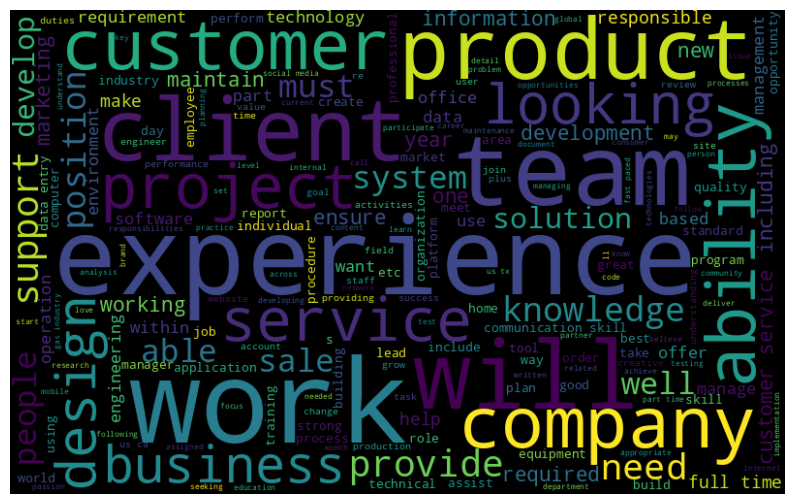

In [ ]:
from wordcloud import WordCloud

words_in_data = ''.join([word for word in jobPostings_df["data_in_text_form"]])

# import os

# # Define the path to the TrueType font file
# font_path = 'C:/Windows/Fonts/arial.ttf'

# Create the WordCloud object with the font_path parameter
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(words_in_data)

# # Generate the word cloud from the text data
# wordcloud.generate(words_in_data)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

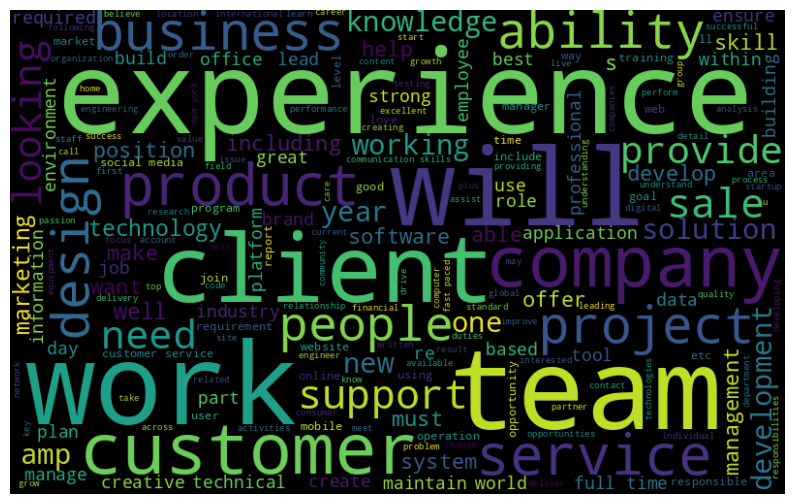

In [ ]:
#now we check most common words used for real jobs
real_jobs = ''.join([text for text in jobPostings_df["data_in_text_form"][jobPostings_df['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=123, max_font_size=120).generate(real_jobs)



plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


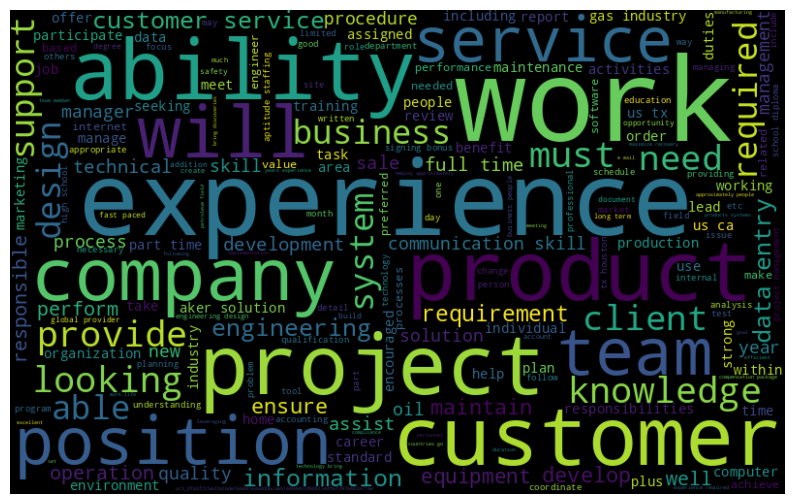

In [ ]:
#now we check most common words used for real jobs
real_jobs = ''.join([text for text in jobPostings_df["data_in_text_form"][jobPostings_df['fraudulent']==1]])
wordcloud = WordCloud(width = 800, height = 500, random_state=123, max_font_size=120).generate(real_jobs)



plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Now we wil use the Natural Language Toolkit to get words that are less important or irrelevant for prediction
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#loading the stopwords
stop_words = set(stopwords.words("english"))



#removing the stop words from the corpus
jobPostings_df['data_in_text_form'] = jobPostings_df['data_in_text_form'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))


jobPostings_df['data_in_text_form'][0]

'sem coordinator gr, i, athens #url_c379aa631173ed5b7c345ab3f500a9a053e509138ca70e52c1088e5a784dc8d7# modern online travel agency founded athens 2005. today, company one leading online travel agencies greece presence 25 countries europe, asia america; offices athens, bucharest sao paulo. right candidate responsible coordinating one dynamic ppc accounts travel industry. she/he responsible planning, developing, deploying reporting sem campaigns close contact company’s management account manager google. furthermore he/she responsible oversight monthly budgets campaigns monitoring company’s kpis (key performance indicators) performance metrics.the sem coordinator experience working large ppc accounts travel industry various markets, several languages. qualified candidates also knowledge various internet marketing channels, search engines, statistical analysis general marketing principles.responsibilities:- manage, analyze optimize international google adwords/yandex/bing campaigns.- develo

In [ ]:
#now we will split the data into train and testing

from sklearn.model_selection import train_test_split

# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(jobPostings_df.data_in_text_form, jobPostings_df.fraudulent, test_size=0.3)


# print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1212,)
X_test shape: (520,)
y_train shape: (1212,)
y_test shape: (520,)


In [ ]:
# To prepare the text data for a machine learning model, we need to convert it to a numerical representation
# One approach is to use the Bag of Words model, which represents text as a matrix of word counts

# Import the CountVectorizer class from the scikit-learn library
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data to learn the vocabulary
vectorizer.fit(X_train)

# Transform the training data into a document-term matrix using the learned vocabulary
X_train_dtm = vectorizer.transform(X_train)

print(X_train_dtm)

  (0, 253)	1
  (0, 353)	1
  (0, 518)	4
  (0, 524)	1
  (0, 539)	2
  (0, 564)	2
  (0, 568)	1
  (0, 591)	1
  (0, 620)	1
  (0, 725)	1
  (0, 738)	2
  (0, 804)	2
  (0, 834)	1
  (0, 1092)	1
  (0, 1114)	1
  (0, 1118)	1
  (0, 1227)	1
  (0, 1303)	1
  (0, 1385)	2
  (0, 1555)	1
  (0, 1564)	3
  (0, 1660)	3
  (0, 1777)	2
  (0, 1963)	2
  (0, 2058)	1
  :	:
  (1211, 16151)	1
  (1211, 16514)	1
  (1211, 16675)	2
  (1211, 16677)	1
  (1211, 16806)	1
  (1211, 17631)	2
  (1211, 17913)	2
  (1211, 17953)	1
  (1211, 18061)	2
  (1211, 18298)	1
  (1211, 18542)	1
  (1211, 18760)	1
  (1211, 18792)	1
  (1211, 19093)	1
  (1211, 19106)	1
  (1211, 19570)	1
  (1211, 19622)	1
  (1211, 19630)	1
  (1211, 19656)	1
  (1211, 19788)	1
  (1211, 19821)	2
  (1211, 19844)	1
  (1211, 19893)	1
  (1211, 19916)	3
  (1211, 20030)	1


In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vectorizer.transform(X_test)
print(X_test_dtm)

  (0, 277)	1
  (0, 518)	1
  (0, 524)	2
  (0, 571)	1
  (0, 589)	2
  (0, 591)	1
  (0, 721)	1
  (0, 1034)	1
  (0, 1129)	1
  (0, 1142)	1
  (0, 1378)	1
  (0, 1423)	1
  (0, 1451)	1
  (0, 1518)	1
  (0, 1559)	1
  (0, 1677)	1
  (0, 1910)	3
  (0, 2205)	1
  (0, 2254)	3
  (0, 2267)	1
  (0, 2472)	1
  (0, 2672)	1
  (0, 2704)	1
  (0, 2757)	1
  (0, 2891)	3
  :	:
  (519, 17443)	1
  (519, 17504)	1
  (519, 17631)	4
  (519, 17704)	1
  (519, 17737)	1
  (519, 17941)	1
  (519, 17969)	1
  (519, 18145)	2
  (519, 18205)	1
  (519, 18279)	2
  (519, 18481)	2
  (519, 19093)	1
  (519, 19231)	1
  (519, 19333)	2
  (519, 19562)	2
  (519, 19581)	3
  (519, 19656)	2
  (519, 19678)	1
  (519, 19821)	1
  (519, 19857)	3
  (519, 19893)	1
  (519, 19928)	1
  (519, 19932)	1
  (519, 20001)	1
  (519, 20030)	9


**Data Preprocessing is Done!! Now we will implement models on our processed data and predict the fraudulent feature**

In [ ]:
#import library for calculating accuracy of models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Predicting using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a Decision Tree classifier
dt = DecisionTreeClassifier()

# Fit the model on the training data
dt.fit(X_train_dtm, y_train)

# Predict the labels of the test data
y_pred = dt.predict(X_test_dtm)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

#Classification report
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

Accuracy: 0.8096153846153846
classification_report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       250
           1       0.81      0.83      0.82       270

    accuracy                           0.81       520
   macro avg       0.81      0.81      0.81       520
weighted avg       0.81      0.81      0.81       520



## Predicting using SVM

In [ ]:
from sklearn.svm import SVC

# Instantiate an SVM classifier
svm = SVC(kernel='linear')

# Fit the model on the training data
svm.fit(X_train_dtm, y_train)

# Predict the labels of the test data
y_pred = svm.predict(X_test_dtm)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

#Classification report
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

Accuracy: 0.8903846153846153
classification_report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       250
           1       0.89      0.90      0.90       270

    accuracy                           0.89       520
   macro avg       0.89      0.89      0.89       520
weighted avg       0.89      0.89      0.89       520



## Predicting using Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes model
mnb_model = MultinomialNB()

# Train the model on the training data
mnb_model.fit(X_train_dtm, y_train)

# Predict the labels of the test data
y_pred = mnb_model.predict(X_test_dtm)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

#Classification report
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

Accuracy: 0.8884615384615384
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       250
           1       0.90      0.88      0.89       270

    accuracy                           0.89       520
   macro avg       0.89      0.89      0.89       520
weighted avg       0.89      0.89      0.89       520



## Predicting using Random Forest Classifier

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

RandF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
RandF_model.fit(X_train_dtm, y_train)

# Predict the labels of the test data
y_pred = RandF_model.predict(X_test_dtm)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

#Classification report
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

Accuracy: 0.9076923076923077
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       250
           1       0.93      0.89      0.91       270

    accuracy                           0.91       520
   macro avg       0.91      0.91      0.91       520
weighted avg       0.91      0.91      0.91       520



### Predicting using XGB

In [ ]:
# Import the necessary libraries
import xgboost as xgb

# Convert the sparse matrix to a dense matrix
X_train_dtm_dense = X_train_dtm.toarray()
X_test_dtm_dense = X_test_dtm.toarray()

# Define the parameters for XGBoost model
# params = {
#     'objective': 'multi:softmax',
#     'num_class': 2,
#     'eval_metric': 'merror',
#     'enable_categorical': True
# }

params = {
    'objective': 'multi:softmax',
    'num_class': 2,
    'eval_metric': 'merror',
    'tree_method': 'hist'  # Change this parameter
    #'enable_categorical': True
}

# Instantiate an XGBoost model
xgb_model = xgb.XGBClassifier(**params)

# Train the model on the training data
xgb_model.fit(X_train_dtm, y_train)

# Predict the labels of the test data
y_pred = xgb_model.predict(X_test_dtm)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

#Classification report
print(f"classification_report:\n {classification_report(y_test,y_pred)}")

Accuracy: 0.8942307692307693
classification_report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       250
           1       0.92      0.87      0.89       270

    accuracy                           0.89       520
   macro avg       0.90      0.90      0.89       520
weighted avg       0.90      0.89      0.89       520



In [ ]:
# Get the predicted probabilities
xgb_model_prob = xgb_model.predict_proba(X_test_dtm)

# Get the predicted probabilities
RandF_model_prob = RandF_model.predict_proba(X_test_dtm)

# Get the predicted probabilities
mnb_model_prob = mnb_model.predict_proba(X_test_dtm)

# Get the predicted probabilities
#svm_prob = svm.predict_proba(X_test_dtm)

# Get the predicted probabilities
decT_prob = dt.predict_proba(X_test_dtm)



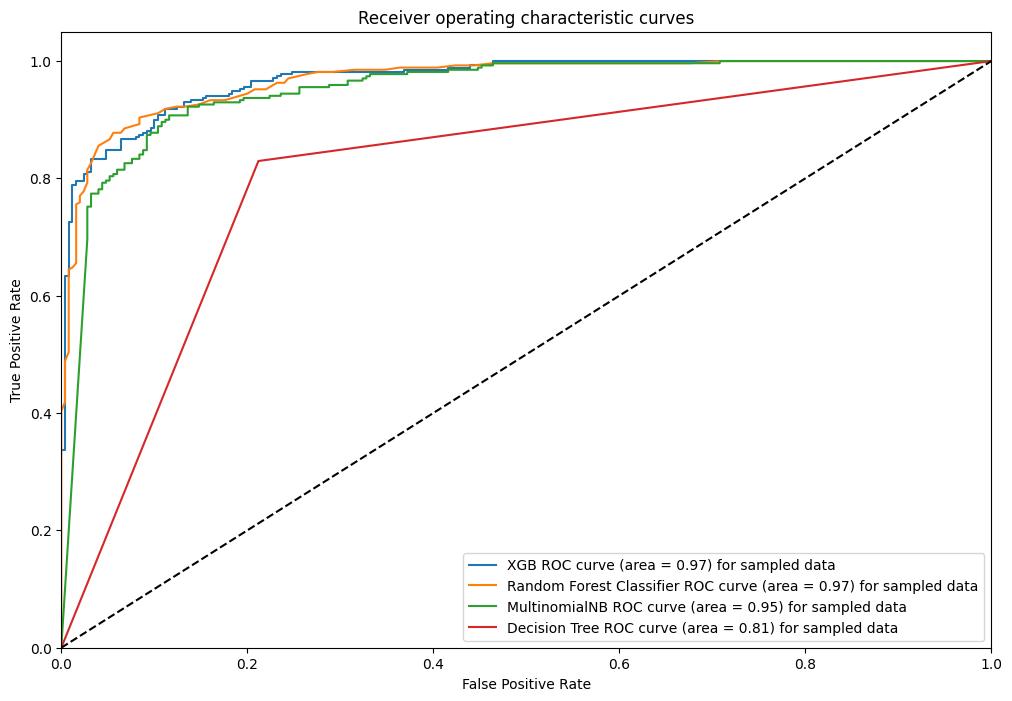

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# Naive Bayes ROC curve
XGB_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_model_prob[:, 1])
xgb_auc = auc(XGB_fpr, xgb_tpr)

plt.plot(XGB_fpr, xgb_tpr, label='XGB ROC curve (area = %0.2f) for sampled data' % xgb_auc)


RandF_fpr, RandF_tpr, _ = roc_curve(y_test, RandF_model_prob[:, 1])
RandF_auc = auc(RandF_fpr, RandF_tpr)

plt.plot(RandF_fpr, RandF_tpr, label='Random Forest Classifier ROC curve (area = %0.2f) for sampled data' % RandF_auc)


mnb_fpr, mnb_tpr, _ = roc_curve(y_test, mnb_model_prob[:, 1])
mnb_auc = auc(mnb_fpr, mnb_tpr)

plt.plot(mnb_fpr, mnb_tpr, label='MultinomialNB ROC curve (area = %0.2f) for sampled data' % mnb_auc)


decT_fpr, decT_tpr, _ = roc_curve(y_test, decT_prob[:, 1])
decT_auc = auc(decT_fpr, decT_tpr)

plt.plot(decT_fpr, decT_tpr, label='Decision Tree ROC curve (area = %0.2f) for sampled data' % decT_auc)

# Plot the ROC curves for all models
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic curves')
plt.legend(loc="lower right")
plt.show()